# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

Based on the document, the data originates from 17 real-world marketing campaigns carried out by a Portuguese bank with the objective of promoting bank deposit subscriptions. These campaigns, spanning from May 2018 to November 2010, involved interactions with a total of 79,354 contacts.

Datasource: https://archive.ics.uci.edu/ml/datasets/bank+marketing

Reference:
    Moro, Sérgio & Cortez, Paulo & Laureano, Raul. (2011). Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. Proceedings of the European Simulation and Modelling Conference.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')
# df = pd.read_csv('data/bank-additional.csv', sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [4]:
# preview the dataset
display(df.info())
display(df.describe())

# display number of missing values by column
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

None

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

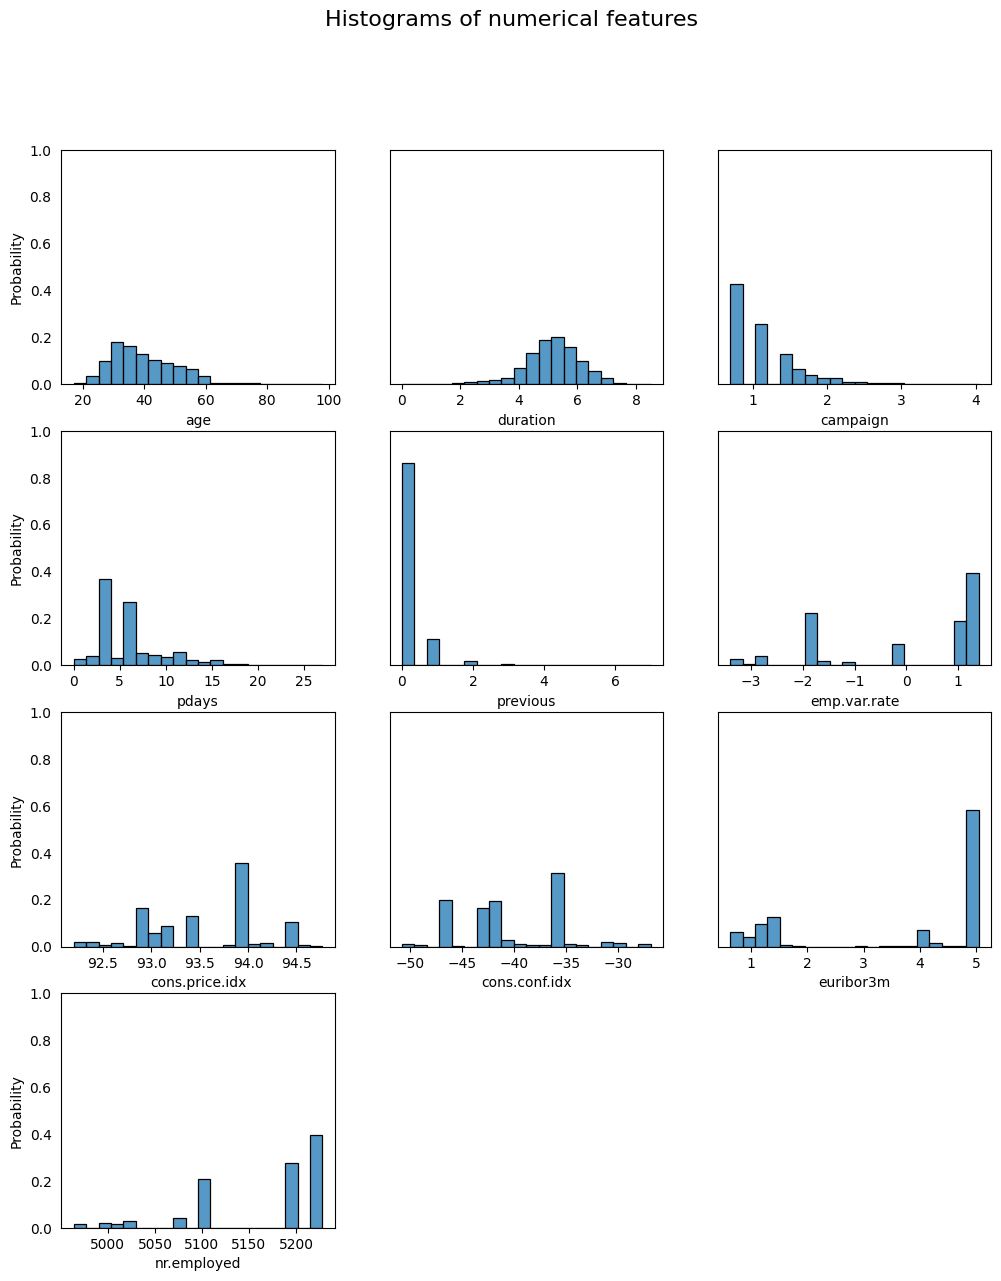

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create a grid of subplots
fig, axs = plt.subplots(4, 3, figsize=(12, 14))
# add title
fig.suptitle('Histograms of numerical features', fontsize=16)

# Flatten the 2D array of subplots into a 1D array
axs = axs.flatten()

# Plot the histograms in separate subplots 
sns.histplot(df['age'],     bins=20,  ax=axs[0], stat='probability')
sns.histplot(np.log1p(df['duration']), bins=20, ax=axs[1], stat='probability')
sns.histplot(np.log1p(df['campaign']), bins=20, ax=axs[2], stat='probability')
sns.histplot(df['pdays'][df['pdays']!=999],    bins=20, ax=axs[3], stat='probability')
sns.histplot(df['previous'], bins=20, ax=axs[4], stat='probability')     
sns.histplot(df['emp.var.rate'], bins=20, ax=axs[5], stat='probability')
sns.histplot(df['cons.price.idx'], bins=20, ax=axs[6], stat='probability')
sns.histplot(df['cons.conf.idx'], bins=20, ax=axs[7], stat='probability')
sns.histplot(df['euribor3m'], bins=20, ax=axs[8], stat='probability')
sns.histplot(df['nr.employed'], bins=20, ax=axs[9], stat='probability')

for i in np.arange(10):
    axs[i].tick_params(left=False, labelleft=(i % 3 == 0))
    axs[i].set_ylim(0, 1)
    if i % 3 == 0 :
        axs[i].set_ylabel('Probability')
    else:
        axs[i].set_ylabel('')
    
# remote last 2 subplots
axs[-1].remove()
axs[-2].remove()

# Display the plot
plt.show()

In [6]:
# print value counts for each categorical feature
print(df.select_dtypes(include='object').columns)
for i in df.select_dtypes(include='object').columns:
    print(df[i].value_counts())

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64
default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64
housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64


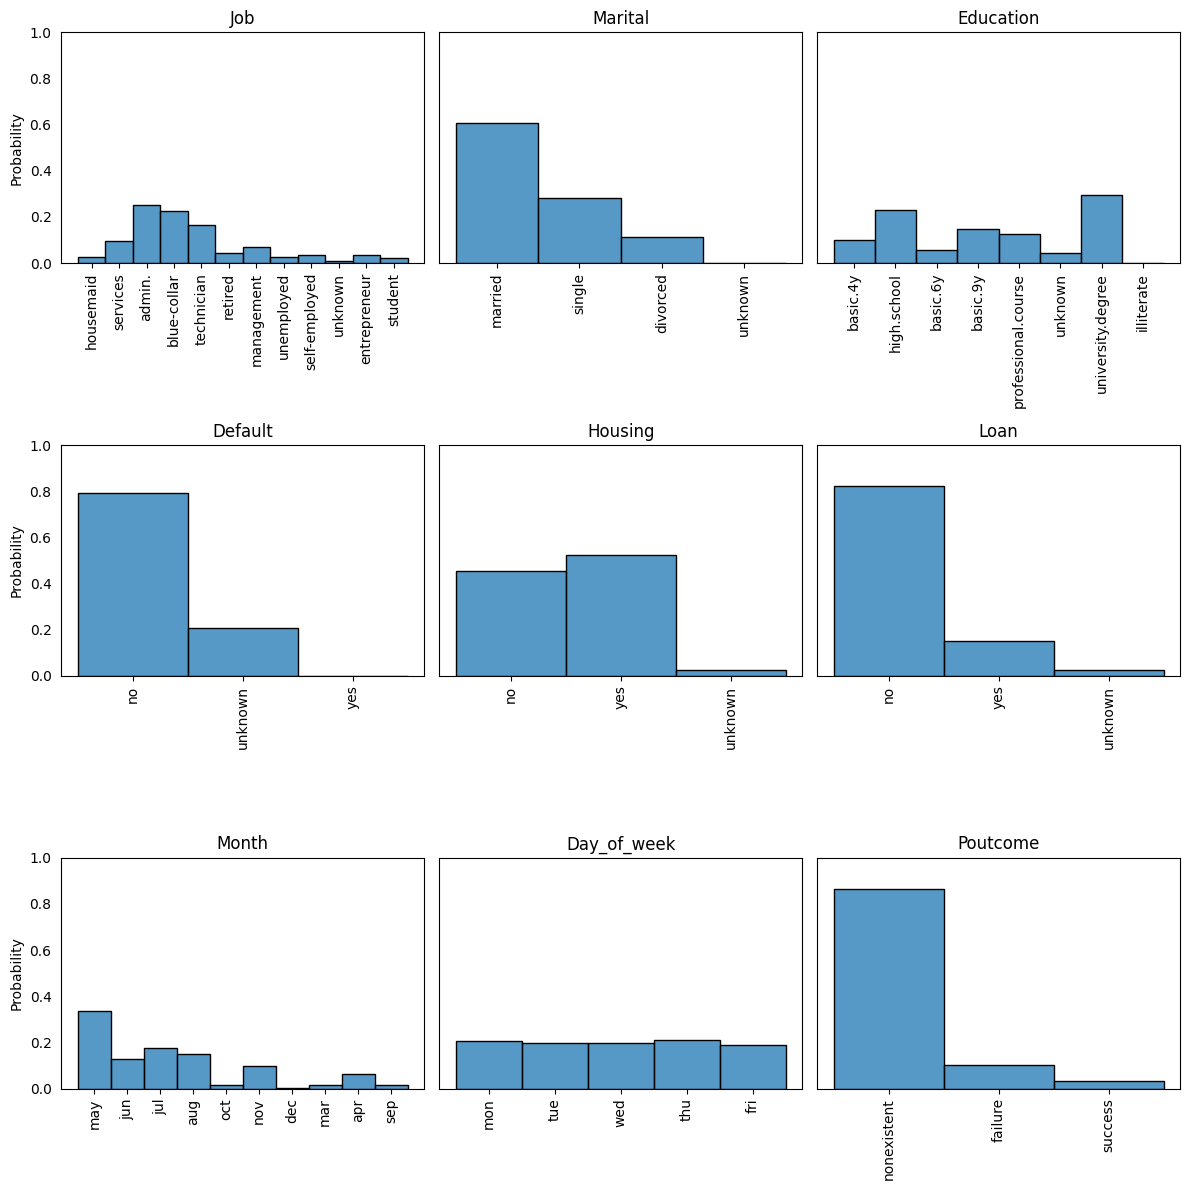

In [7]:

# create histograms for categorical features :
columns = ['job', 'marital', 'education', 
           'default', 'housing', 'loan', 
           'month', 'day_of_week','poutcome']

# Create a grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(12, 12))

# Flatten the 2D array of subplots into a 1D array
axs = axs.flatten()

# Loop over the columns and plot a histogram in each subplot
for i, col in enumerate(columns):
    sns.histplot(df[col], ax=axs[i], kde=False, stat='probability')
    axs[i].set_title(col.capitalize())
    if i%3 == 0 :
        axs[i].set_ylabel('Probability')
    else:
        axs[i].set_ylabel('')
    axs[i].set_xlabel('')
    axs[i].tick_params(left=False, labelleft=(i % 3 == 0))
    axs[i].tick_params(axis='x', labelrotation=90)
    axs[i].set_ylim(0, 1)

# Remove the unused subplots
for i in range(len(columns), len(axs)):
    axs[i].remove()

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [9]:
df.select_dtypes(include='object').columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

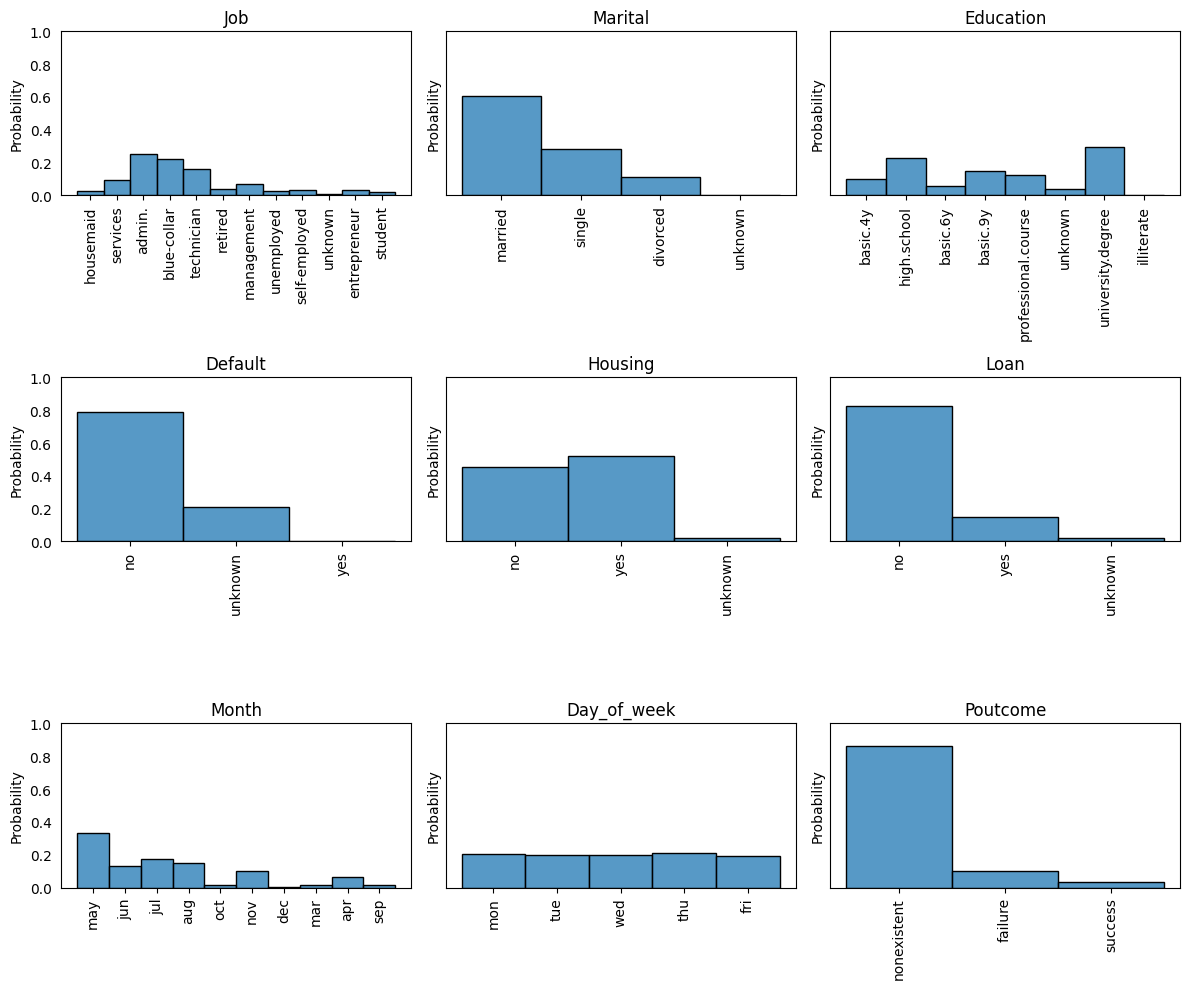

In [10]:
# create histograms for categorical features :
columns = ['job', 'marital', 'education',
           'default', 'housing', 'loan',
           'month', 'day_of_week', 'poutcome']

# Create a grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(12, 10))

# Flatten the 2D array of subplots into a 1D array
axs = axs.flatten()

# Loop over the columns and plot a histogram in each subplot
for i, col in enumerate(columns):
    sns.histplot(df[col], ax=axs[i], kde=False, stat='probability')
    axs[i].set_title(col.capitalize())
    axs[i].set_ylabel('Probability')
    axs[i].set_xlabel('')
    axs[i].tick_params(left=False, labelleft=(i % 3 == 0))
    axs[i].tick_params(axis='x', labelrotation=90)
    axs[i].set_ylim(0, 1)

# Remove the unused subplots
for i in range(len(columns), len(axs)):
    axs[i].remove()

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Prepare the features and target column for modeling with appropriate encoding and transformations.

In [11]:
data=df.copy()
# convert the 'y' target column to a binary numeric variable
data['y'] = data['y'].map({'yes': 1, 'no': 0})


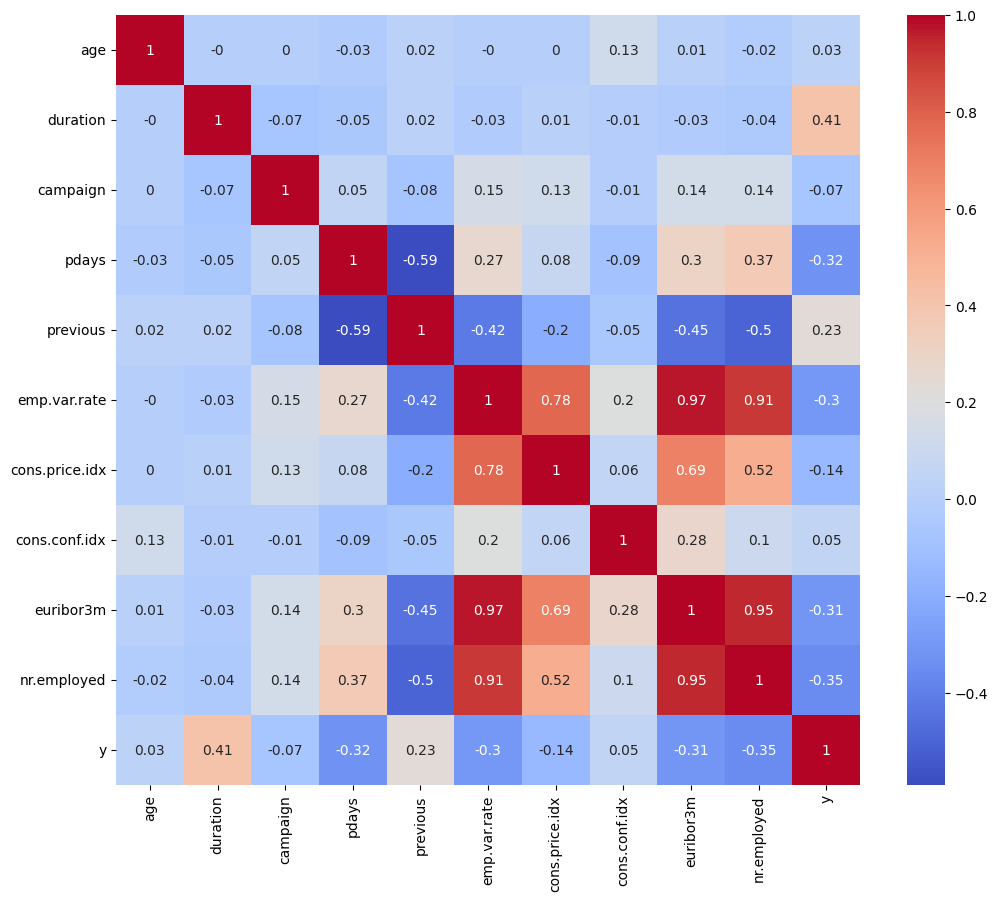

In [12]:
# draw coorelation heatmap for numeric features:
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(12, 10))
sns.heatmap(data[numeric_columns].corr().round(2),annot=True, cmap='coolwarm')
plt.show()

In [13]:
# as euribor3m is highly correlated to nr.employed and emp.var.rate, we will drop euibor3m
data.drop('euribor3m', axis=1, inplace=True)

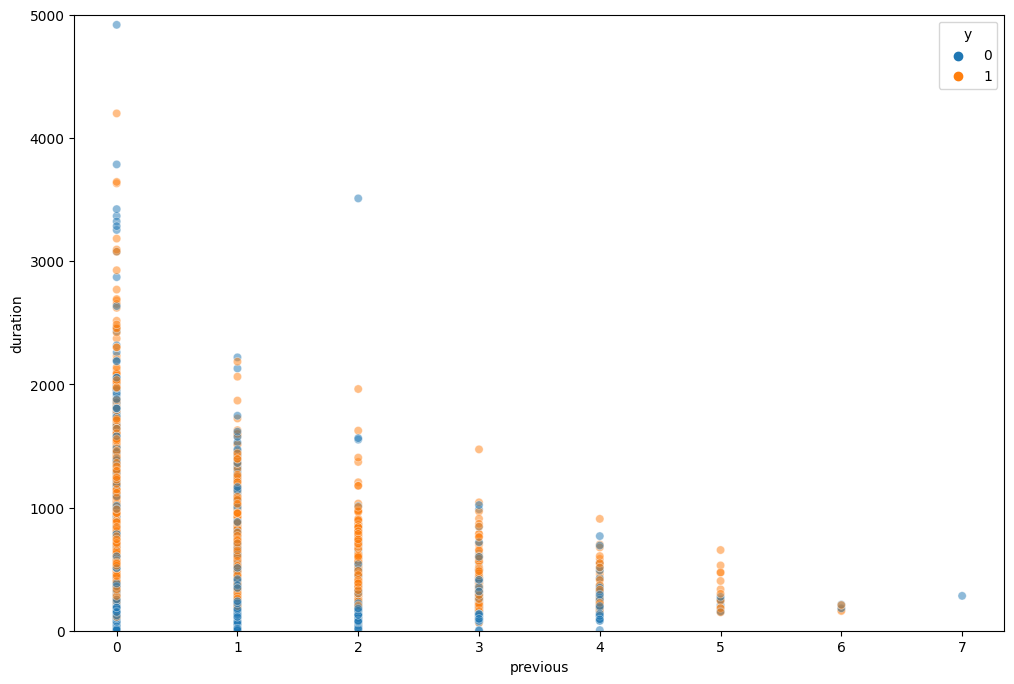

In [14]:
# draw scatter plot of duration against age colored by y
plt.figure(figsize=(12, 8))
sns.scatterplot(x='previous', y='duration', hue='y', data=data, alpha=0.5)
# y axis start from 0
plt.ylim(0, 5000)
plt.show()


In [32]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

# define the column transformer for the categorical and numerical columns
categorical_features = ['job', 'marital', 'contact']
numeric_features = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 
                  'cons.price.idx', 'cons.conf.idx', 'nr.employed'] # 'euribor3m' has been excluded
binary_features = ['default', 'housing', 'loan',  'poutcome']

education_ord = ['illiterate', 'basic.4y', 'basic.6y','basic.9y', 'high.school', 'professional.course', 'university.degree']
month_ord = ['jan', 'feb', 'mar', 'apr','may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec']
weekday_ord = ['mon', 'tue', 'wed','thu', 'fri', 'sat', 'sun']	

preprocessor = ColumnTransformer(
    transformers=[
        # one-hot encode the categorical features drop if binary
        ('cat', OneHotEncoder(drop='if_binary'), categorical_features),
        ('num', StandardScaler(), numeric_features),
        ('bin', OrdinalEncoder(categories=[['no','yes'],['no','yes'],['no','yes'],['failure','success']]
                               ,unknown_value=-1, handle_unknown='use_encoded_value'),
                                 binary_features),
        ('edu', OrdinalEncoder(categories=[education_ord,month_ord,weekday_ord]
                               ,unknown_value=-1, handle_unknown='use_encoded_value'), 
                               ['education','month','day_of_week']) 
    ],
        remainder='passthrough')

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [16]:
from sklearn.model_selection import train_test_split

# Set X and y
X = data.drop('y', axis=1)
y = data['y']

# Split the data into training and test sets 30% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

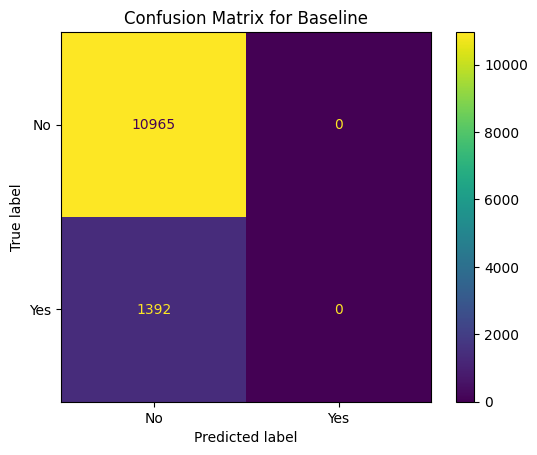

Classification Report for Baseline
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     10965
           1       0.00      0.00      0.00      1392

    accuracy                           0.89     12357
   macro avg       0.44      0.50      0.47     12357
weighted avg       0.79      0.89      0.83     12357



In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

# disable warnings
import warnings
warnings.filterwarnings('ignore')

# Defining the most frequent strategy as our baseline
dummy_clf = DummyClassifier(strategy='most_frequent')
# Fit the model
dummy_clf.fit(X_train, y_train)

# get confusion matrix
model_name = 'Baseline'
y_pred = dummy_clf.predict(X_test)
cm  = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm ,display_labels = ['No', 'Yes'])
disp.plot()
# add title to the confusion matrix
plt.title(f'Confusion Matrix for {model_name}')
plt.show()
print(f'Classification Report for {model_name}')
print(classification_report(y_test, y_pred))

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [18]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression

# create a logistic regression pipeline with the preprocessor defined earlier
log_reg_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('log_reg', LogisticRegression(solver='liblinear'))
])
log_reg_pipe.fit(X_train, y_train)




Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['job', 'marital',
                                                   'contact']),
                                                 ('num', StandardScaler(),
                                                  ['age', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx',
                                                   'nr.employed']),
                                                 ('bin',
                                                  OrdinalEncoder(categories=[['no',
                                                                              'yes'],
                                                                             ['no',
                                                                              'yes'...
                                                                              'basic.4y',
                                                                              'basic.6y',
                                                                              'basic.9y',
                                                                              'high.school',
                                                                              'professional.course',
                                                                              'university.degree'],
                                                                             ['jan',
                                                                              'feb',
                                                                              'mar',
                                                                              'apr',
                                                                              'may',
                                                                              'jun',
                                                                              'jul',
                                                                              'aug',
                                                                              'sep',
                                                                              'oct',
                                                                              'nov',
                                                                              'dec'],
                                                                             ['mon',
                                                                              'tue',
                                                                              'wed',
                                                                              'thu',
                                                                              'fri',
                                                                              'sat',
                                                                              'sun']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['education', 'month',
                                                   'day_of_week'])])),
                ('log_reg', LogisticRegression(solver='liblinear'))])

### Problem 9: Score the Model

What is the accuracy of your model?

In [19]:
y_pred = log_reg_pipe.predict(X_test)
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.9105770008901837


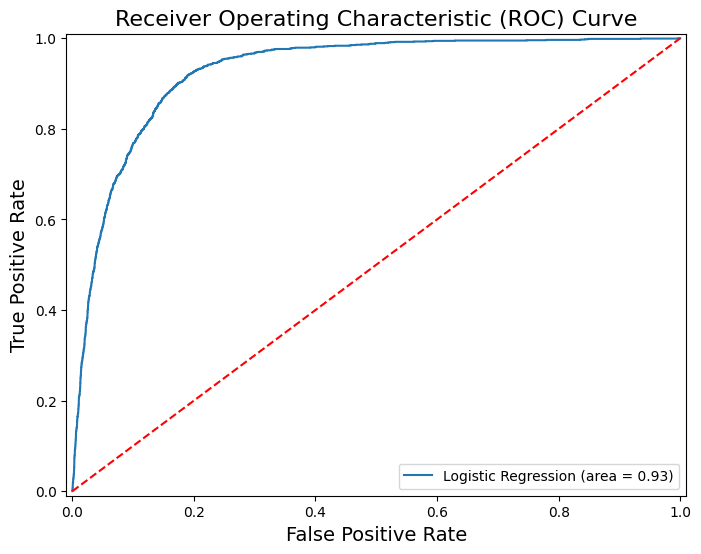

In [20]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_prob = log_reg_pipe.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc_score(y_test, y_pred_prob))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(loc="lower right")
plt.show()

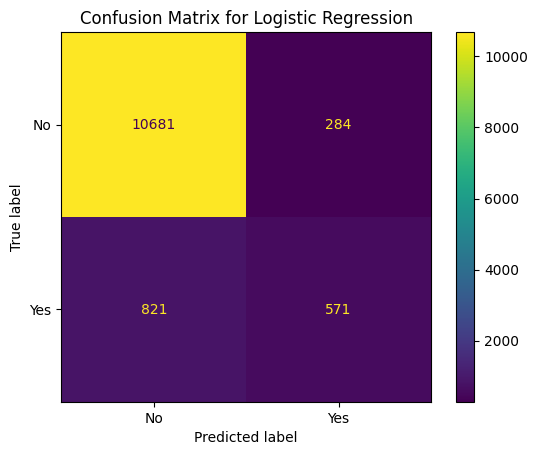

Classification Report for Logistic Regression
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10965
           1       0.67      0.41      0.51      1392

    accuracy                           0.91     12357
   macro avg       0.80      0.69      0.73     12357
weighted avg       0.90      0.91      0.90     12357



In [21]:
# get confusion matrix
model_name = 'Logistic Regression'
cm  = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm ,display_labels = ['No', 'Yes'])
disp.plot()
# add title to the confusion matrix
plt.title(f'Confusion Matrix for {model_name}')
plt.show()
print(f'Classification Report for {model_name}')
print(classification_report(y_test, y_pred))


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [22]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Models to be tested
models = {
    'knn': (KNeighborsClassifier(),{}),
    'logistic': (LogisticRegression(max_iter=200),{}),
    'tree': (DecisionTreeClassifier(max_depth=20),{}),
    'svm': (SVC(probability=True,kernel='linear'),{})
}
# create dataframe to capture model metrics
model_metrics = []

# loop through the models dictionary items
for model_name, (model, params) in models.items():

    # create pipeline for each model using the preprocessor defined earlier
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    # create a grid search object
    grid_search = GridSearchCV(pipe, params, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
    
    # fit the grid search object to the training data
    grid_search.fit(X_train, y_train)

    # capture the best estimator and the best parameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # predict on the test data using the best estimator
    y_pred = best_model.predict(X_test)

    # compute the accuracy score
    train_accuracy = accuracy_score(y_train, best_model.predict(X_train))
    test_accuracy = accuracy_score(y_test, y_pred)
    
    # training time taken
    train_time = grid_search.cv_results_.get('mean_fit_time').mean()

    # append the model metrics to the model_metrics list
    model_metrics.append([model_name, best_params, train_time, train_accuracy, test_accuracy, best_model])

# create a dataframe from the model_metrics list
model_metrics_df = pd.DataFrame(model_metrics, columns=['model_name', 'best_params', 'train_time', 'train_accuracy', 'test_accuracy','model'])

# display the dataframe
model_metrics_df[['model_name', 'train_time', 'train_accuracy', 'test_accuracy']]



Fitting 5 folds for each of 1 candidates, totalling 5 fits


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/home/kilren/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/kilren/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


,model_name,train_time,train_accuracy,test_accuracy
0,knn,0.119065,0.927786,0.900866
1,logistic,0.972363,0.910409,0.910658
2,tree,0.232889,0.995248,0.883224
3,svm,120.324658,0.901946,0.901190


The Decision Tree model, while performing impressively on the training set, underperforms on the test set, hinting at overfitting. On the other hand, both the Logistic Regression and SVM models maintain consistent accuracy scores across the training and test sets, making them preferable choices for this data. KNN displays a slightly higher discrepancy between training and test results compared to Logistic Regression and SVM.

Given these observations, the **Logistic Regression** model emerges as the most promising for our dataset. Its lower training time, compared to SVM, strengthens its position as the preferred model.

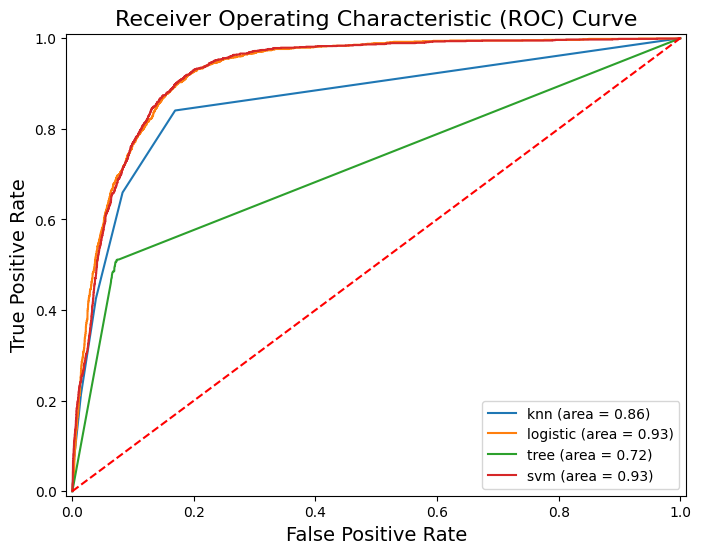

In [23]:
# Compare ROC for each model

plt.figure(figsize=(8, 6))

for model_name, best_params, train_time, train_accuracy, test_accuracy, best_model in model_metrics:
    y_pred_prob = best_model.predict_proba(X_test)[:,1]
    
    # Generate ROC curve values: fpr, tpr, thresholds
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (area = %0.2f)' % roc_auc_score(y_test, y_pred_prob))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title(f'Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(loc="lower right")
plt.show()



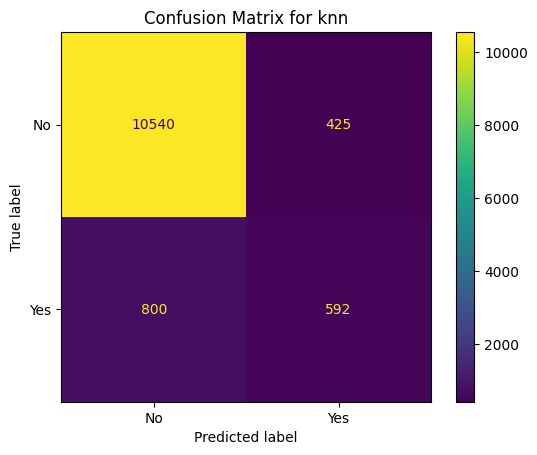

Classification Report for knn
              precision    recall  f1-score   support

           0       0.93      0.96      0.95     10965
           1       0.58      0.43      0.49      1392

    accuracy                           0.90     12357
   macro avg       0.76      0.69      0.72     12357
weighted avg       0.89      0.90      0.89     12357



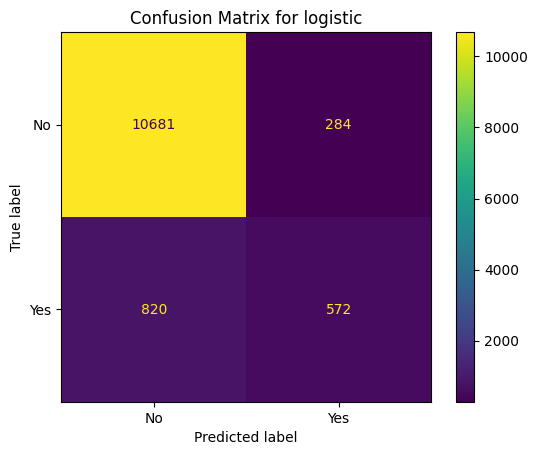

Classification Report for logistic
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10965
           1       0.67      0.41      0.51      1392

    accuracy                           0.91     12357
   macro avg       0.80      0.69      0.73     12357
weighted avg       0.90      0.91      0.90     12357



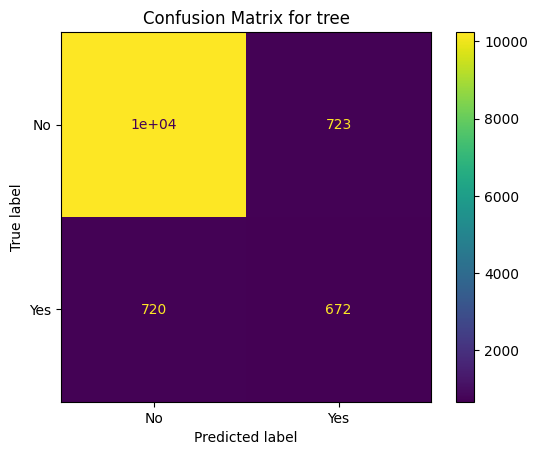

Classification Report for tree
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     10965
           1       0.48      0.48      0.48      1392

    accuracy                           0.88     12357
   macro avg       0.71      0.71      0.71     12357
weighted avg       0.88      0.88      0.88     12357



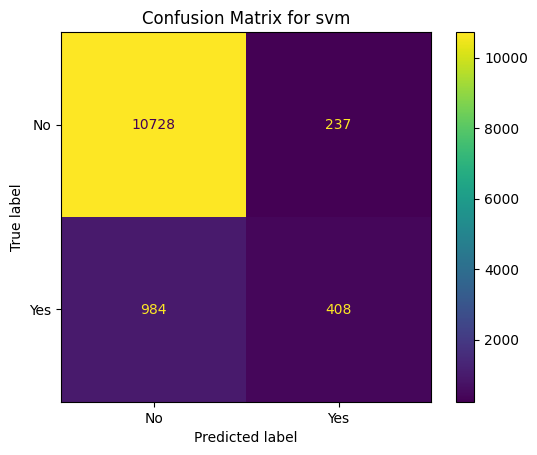

Classification Report for svm
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10965
           1       0.63      0.29      0.40      1392

    accuracy                           0.90     12357
   macro avg       0.77      0.64      0.67     12357
weighted avg       0.88      0.90      0.88     12357



In [24]:
# get confusion matrix and classification report for each model
for model_name, best_params, train_time, train_accuracy, test_accuracy, best_model in model_metrics:
    y_pred = best_model.predict(X_test)
    cm  = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm ,display_labels = ['No', 'Yes'])
    disp.plot()
    # add title to the confusion matrix
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()
    print(f'Classification Report for {model_name}')
    print(classification_report(y_test, y_pred))

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

#### Approach for Improving the Model:
    * As the data are very imbalanced, we should use F1 score instead of accuracy.
    * We will also use grid search to find the best hyperparameters for each model.


In [25]:
# Models and their parameters
models = {
    'knn': (KNeighborsClassifier(), {'model__n_neighbors': [3, 5, 7, 9, 11, 13, 17, 19]}),
    'logistic': (LogisticRegression(), {'model__C': [0.1, 1, 10, 100, 1000], 'model__penalty': ['l1', 'l2'], 'model__max_iter':[100,200,500,1000]}),
    'tree': (DecisionTreeClassifier(), {'model__max_depth': [5, 10, 20], 'model__criterion': ['gini', 'entropy'], 'model__min_samples_split': [2, 5, 10], 'model__min_samples_leaf': [1, 2, 5]}),
    'svm': (SVC(probability=True), {'model__C': [0.1, 1, 10], 'model__kernel': ['linear', 'rbf']})
}
# create dataframe to capture model metrics
model_metrics = []

# loop through the models dictionary items
for model_name, (model, params) in models.items():

    # create pipeline for each model using the preprocessor defined earlier
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    # create a grid search object
    grid_search = GridSearchCV(pipe, params, cv=5, scoring='f1', n_jobs=-1, verbose=1)
    
    # fit the grid search object to the training data
    grid_search.fit(X_train, y_train)

    # capture the best estimator and the best parameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # predict on the test data using the best estimator
    y_pred = best_model.predict(X_test)

    # compute the accuracy score
    train_accuracy = accuracy_score(y_train, best_model.predict(X_train))
    test_accuracy = accuracy_score(y_test, y_pred)
    
    # training time taken
    train_time = grid_search.cv_results_.get('mean_fit_time').mean()

    # append the model metrics to the model_metrics list
    model_metrics.append([model_name, best_params, train_time, train_accuracy, test_accuracy, best_model])

# create a dataframe from the model_metrics list
model_metrics_df = pd.DataFrame(model_metrics, columns=['model_name', 'best_params', 'train_time', 'train_accuracy', 'test_accuracy','model'])

# display the dataframe
model_metrics_df[['model_name', 'best_params', 'train_time', 'train_accuracy', 'test_accuracy']]



Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 40 candidates, totalling 200 fits


/home/kilren/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/kilren/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits


,model_name,best_params,train_time,train_accuracy,test_accuracy
0,knn,{'model__n_neighbors': 7},0.162392,0.923277,0.903294
1,logistic,"{'model__C': 10, 'model__max_iter': 100, 'mode...",1.170435,0.910305,0.910658
2,tree,"{'model__criterion': 'entropy', 'model__max_de...",0.376448,0.914224,0.914057
3,svm,"{'model__C': 10, 'model__kernel': 'rbf'}",226.985150,0.921751,0.911224


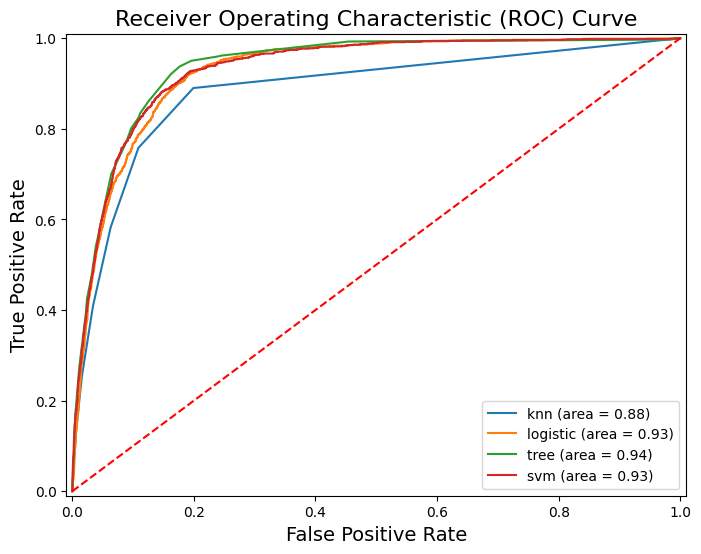

In [26]:
# Compare ROC for each model

plt.figure(figsize=(8, 6))

for model_name, best_params, train_time, train_accuracy, test_accuracy, best_model in model_metrics:
    y_pred_prob = best_model.predict_proba(X_test)[:,1]
    
    # Generate ROC curve values: fpr, tpr, thresholds
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (area = %0.2f)' % roc_auc_score(y_test, y_pred_prob))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title(f'Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(loc="lower right")
plt.show()


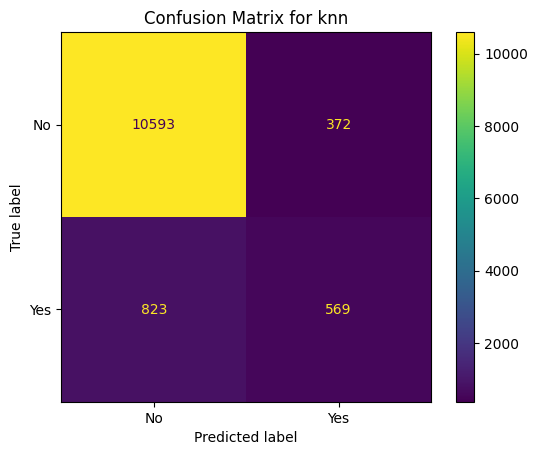

Classification Report for knn
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10965
           1       0.60      0.41      0.49      1392

    accuracy                           0.90     12357
   macro avg       0.77      0.69      0.72     12357
weighted avg       0.89      0.90      0.89     12357



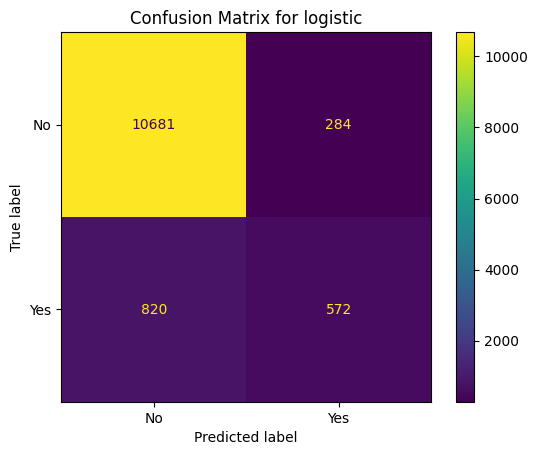

Classification Report for logistic
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10965
           1       0.67      0.41      0.51      1392

    accuracy                           0.91     12357
   macro avg       0.80      0.69      0.73     12357
weighted avg       0.90      0.91      0.90     12357



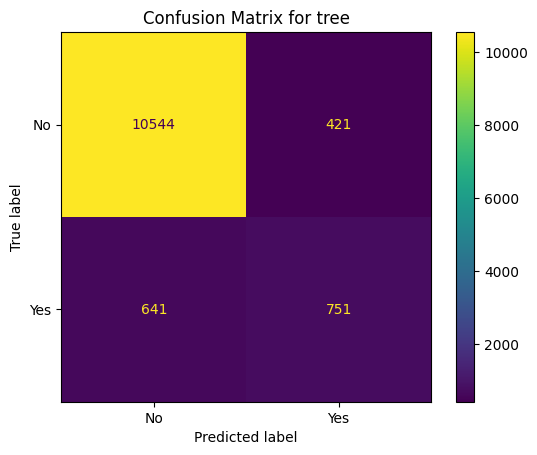

Classification Report for tree
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10965
           1       0.64      0.54      0.59      1392

    accuracy                           0.91     12357
   macro avg       0.79      0.75      0.77     12357
weighted avg       0.91      0.91      0.91     12357



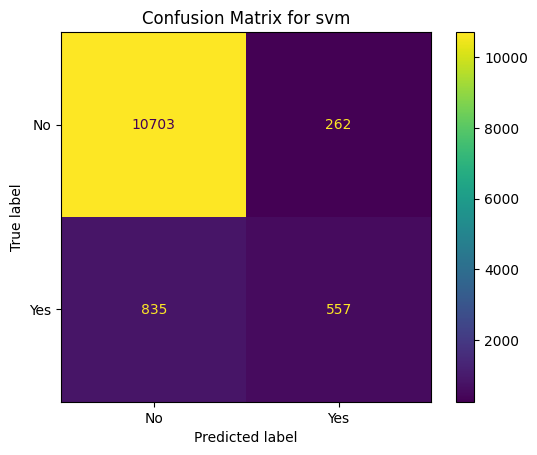

Classification Report for svm
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     10965
           1       0.68      0.40      0.50      1392

    accuracy                           0.91     12357
   macro avg       0.80      0.69      0.73     12357
weighted avg       0.90      0.91      0.90     12357



In [27]:
# get confusion matrix and classification report for each model
for model_name, best_params, train_time, train_accuracy, test_accuracy, best_model in model_metrics:
    y_pred = best_model.predict(X_test)
    cm  = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm ,display_labels = ['No', 'Yes'])
    disp.plot()
    # add title to the confusion matrix
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()
    print(f'Classification Report for {model_name}')
    print(classification_report(y_test, y_pred))

#### Best model:
Overall, the Decision Tree is performing the best, with the highest F1 score and accuracy. However, the Logistic Regression model is not far behind, but it is slower to train. Therefore, we will choose the **Decision Tree** model as our best model. 
The hyperparameters for the Decision tree are:

    * criterion: entropy
    * max_depth: 5
    * min_samples_leaf: 5

In [28]:
from sklearn.tree import plot_tree
best_model = model_metrics_df.loc[2, 'model']
display(best_model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['job', 'marital',
                                                   'contact']),
                                                 ('num', StandardScaler(),
                                                  ['age', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx',
                                                   'nr.employed']),
                                                 ('bin',
                                                  OrdinalEncoder(categories=[['no',
                                                                              'yes'],
                                                                             ['no',
                                                                              'yes'...
                                                                              'high.school',
                                                                              'professional.course',
                                                                              'university.degree'],
                                                                             ['jan',
                                                                              'feb',
                                                                              'mar',
                                                                              'apr',
                                                                              'may',
                                                                              'jun',
                                                                              'jul',
                                                                              'aug',
                                                                              'sep',
                                                                              'oct',
                                                                              'nov',
                                                                              'dec'],
                                                                             ['mon',
                                                                              'tue',
                                                                              'wed',
                                                                              'thu',
                                                                              'fri',
                                                                              'sat',
                                                                              'sun']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['education', 'month',
                                                   'day_of_week'])])),
                ('model',
                 DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                        min_samples_leaf=5))])

In [29]:
OneHotEncoder_columns = best_model.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out()
featureNames =  []
featureNames.extend(OneHotEncoder_columns)
featureNames.extend(numeric_features)
featureNames.extend(binary_features)
featureNames.extend(['education','month','day_of_week'])


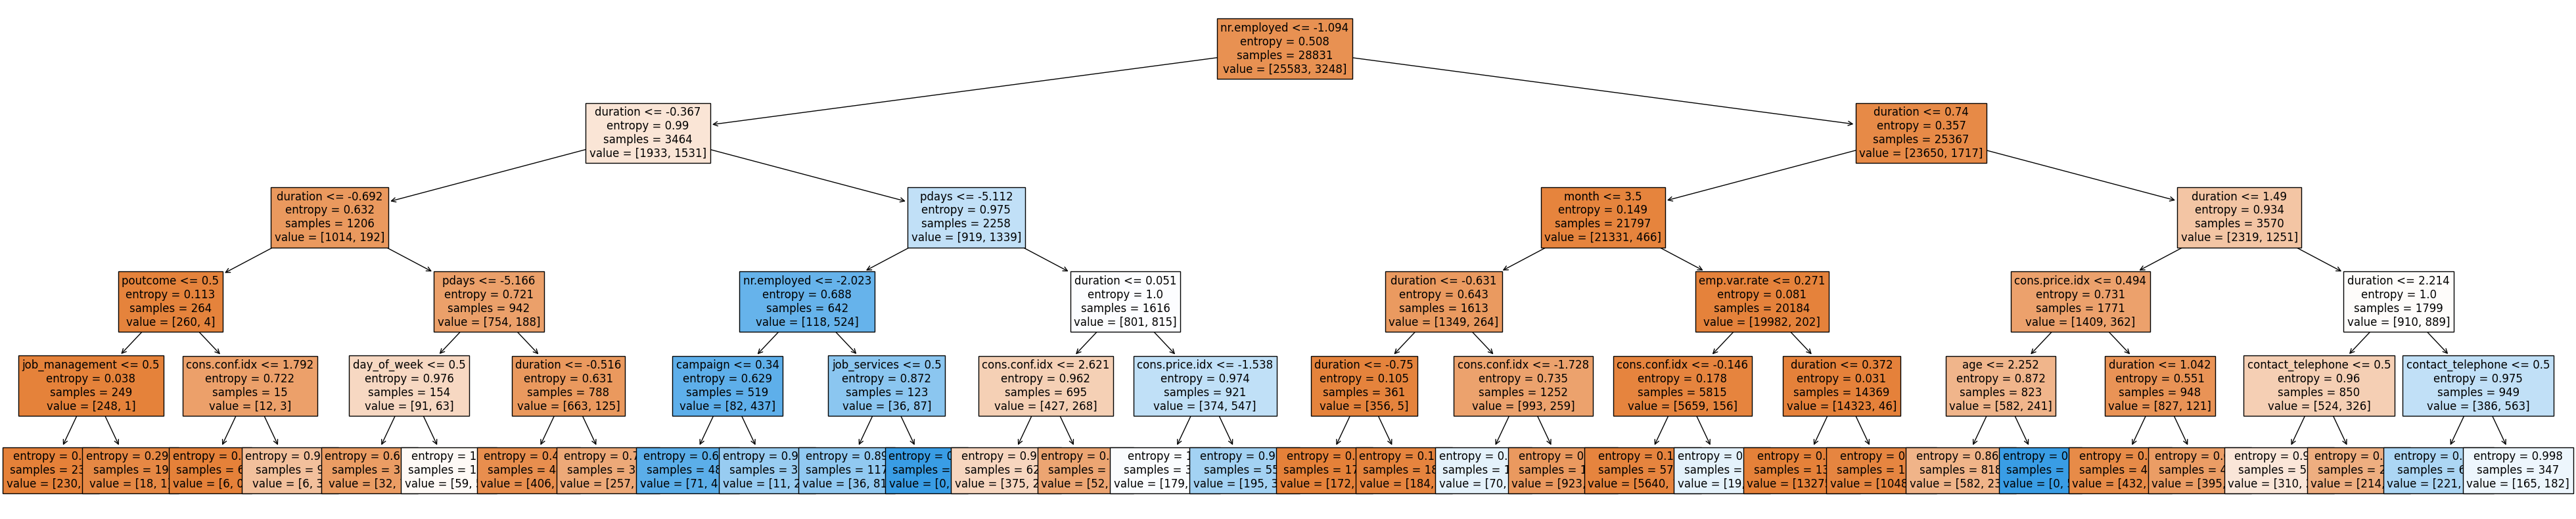

In [39]:
# display decision tree
from sklearn.tree import plot_tree

plt.figure(figsize=(50, 10))
plot_tree(model_metrics_df.loc[2, 'model'].named_steps['model'], feature_names=featureNames, filled=True, fontsize=12)
plt.show()


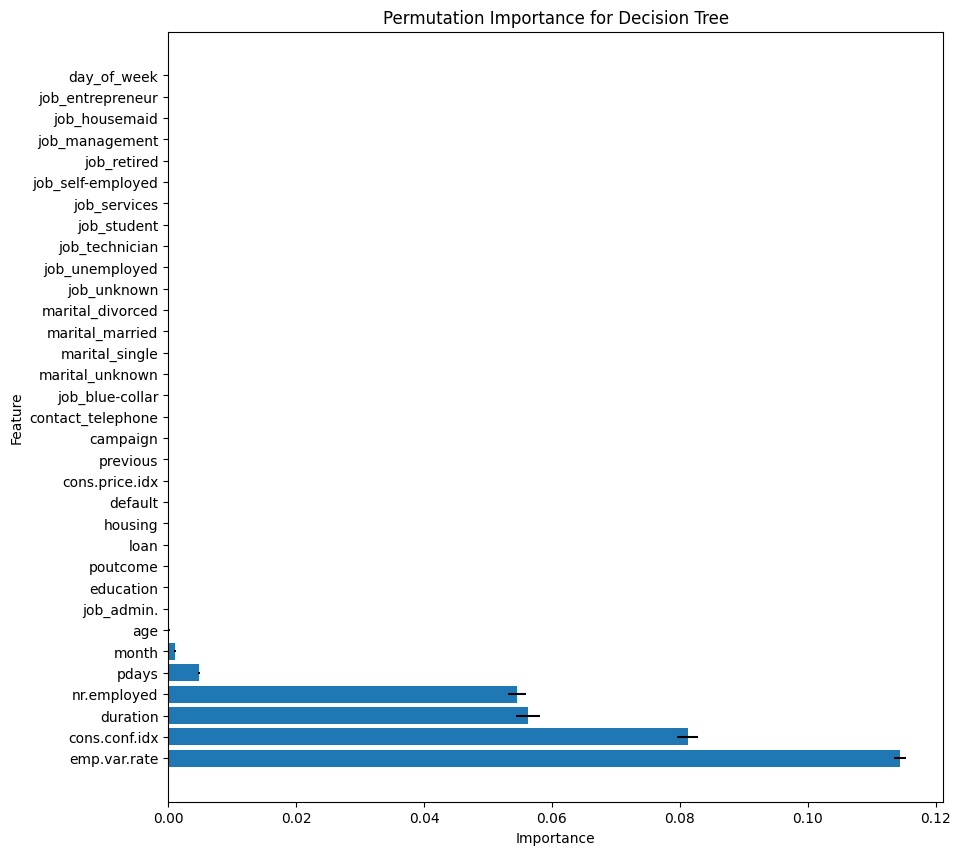

In [31]:
# draw permutation importance plot for the best model
from sklearn.inspection import permutation_importance

# get the best model
best_model = model_metrics_df.loc[2, 'model']

X_transformed = best_model.named_steps['preprocessor'].transform(X_test)

# get the feature importance
result = permutation_importance(best_model.named_steps['model'], X_transformed, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# create a dataframe from the result
perm_importance_df = pd.DataFrame({'feature': featureNames, 'importance_mean': result['importances_mean'], 'importance_std': result['importances_std']})

# sort the dataframe by importance_mean
perm_importance_df.sort_values(by='importance_mean', ascending=False, inplace=True)

# plot the dataframe
plt.figure(figsize=(10, 10))
plt.barh(perm_importance_df['feature'], perm_importance_df['importance_mean'], xerr=perm_importance_df['importance_std'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Permutation Importance for Decision Tree')
plt.show()

## Conclusions

- Due to the heavily unbalanced dataset labels, the model performance is limited. To address this issue, we have chosen the F1 score as the primary performance metric and used AUC to compare the models and make the final selection.
- All models outperformed the baseline, indicating positive outcomes.

- The Decision Tree Classifier emerges as the best model for customer classification, offering potential to classify on both labels.

- The data derived from marketing campaigns appears to lack relevance. Most of the features are not predictive of the outcome. The selected model relying only on the following features:
  - emp.var.rate
  - cons.conf.idx
  - duration
  - nr.employed
  - pdays
  - month
  - age

**Overall conclusion:**

Despite the efforts, the model would be limited as a practical tool for customer classification.

## Next Steps

### Potential improvements to the models could include

In order to improve the model, we could try to gather more information regarding the customers, such as income, and there banking profile as well as trying to reduce the number of unknown values.

### In terms of future campaigns, the bank could consider

- We could also utilize SMOTE to address class imbalance, potentially improving model accuracy. However, we shall monitor for introduction of noise.
